## Zachariah Abueg
#### NID: 4187946
#### PHZ 3150
#### Final Project
#### Sunday, April 11, 2021

### Problem 0

In [1]:
# part a
print("Problem 0:")

Problem 0:


In [2]:
# part b
import numpy as np
import scipy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pickle
import math
import random

In [3]:
# part c
from scipy.stats import chisquare

In [4]:
# part d
### downloaded all files from demos/final_project and transferred them to my Final_project_zachariahabueg folder

In [5]:
# part e
### created Final_project folder and uploaded finalproject_zachariahabueg.ipynb to github

### Problem 1

In [6]:
print("Problem 1:")

Problem 1:


In [7]:
# part 0

# resolution = λ2 / (λ2 - λ1)
# assume a starting wavelength λ1 = 0.5 * 10^-6 m = 0.0000005 m
# then we have resolution = λ2 / (λ2 - 0.0000005),
# so λ2 = (resolution) * (λ2 - 0.0000005), or λ2 * (1 - resolution) = -0.0000005 * resolution,
# or λ2 = 0.0000005 * resolution / (resolution - 1)
# also assume a step of 0.1
# then given the resolution, we can find λ2
# knowing λ1 = 0.5, λ2, and step = 0.1, star(T, resolution) will return a list of spectrums for each T and λ

def star(T, resolution):
    """Takes as input a temperature T and resolution and calculates the stellar spectrum/energy emitted by the star
    Input: temperature T (in K), resolution (unitless)
    Output: stellar spectrum / energy per unit wavelength (in J/(s*m^3))"""
    
    # define or calculate constants
    # since we will be calling star() with a resolution = 100, 
    # i preemptively chose a reasonable step size to make for a good number of wavelengths
    lambda1 = 0.0000005
    lambda2 = 0.0000005 * resolution / (resolution - 1)
    step = 1e-10
    h = 6.62607004e-34
    c = 299792458
    kB = 1.38064852e-23
    
    # set up wavelengths and spectrums arrays
    wavelengths = np.arange(lambda1, lambda2, step)
    spectrums = []
    
    # for each wavelength, calculate its spectrum and append the spectrum to the spectrums array
    for w in wavelengths:
        B = (2 * h * c**2) / (w**5) * 1 / (math.exp((h * c) / (w * kB * T)) - 1)
        spectrums.append(B)
    
    return wavelengths, np.array(spectrums)

Wavelengths: [5.000e-07 5.001e-07 5.002e-07 5.003e-07 5.004e-07 5.005e-07 5.006e-07
 5.007e-07 5.008e-07 5.009e-07 5.010e-07 5.011e-07 5.012e-07 5.013e-07
 5.014e-07 5.015e-07 5.016e-07 5.017e-07 5.018e-07 5.019e-07 5.020e-07
 5.021e-07 5.022e-07 5.023e-07 5.024e-07 5.025e-07 5.026e-07 5.027e-07
 5.028e-07 5.029e-07 5.030e-07 5.031e-07 5.032e-07 5.033e-07 5.034e-07
 5.035e-07 5.036e-07 5.037e-07 5.038e-07 5.039e-07 5.040e-07 5.041e-07
 5.042e-07 5.043e-07 5.044e-07 5.045e-07 5.046e-07 5.047e-07 5.048e-07
 5.049e-07 5.050e-07] 

Spectrums at 2000K: [2.15053736e+09 2.15457789e+09 2.15862395e+09 2.16267556e+09
 2.16673271e+09 2.17079542e+09 2.17486369e+09 2.17893751e+09
 2.18301690e+09 2.18710185e+09 2.19119238e+09 2.19528848e+09
 2.19939017e+09 2.20349744e+09 2.20761029e+09 2.21172874e+09
 2.21585279e+09 2.21998243e+09 2.22411768e+09 2.22825854e+09
 2.23240500e+09 2.23655709e+09 2.24071479e+09 2.24487812e+09
 2.24904708e+09 2.25322167e+09 2.25740189e+09 2.26158776e+09
 2.26577927e+09 2.2

[None, None]

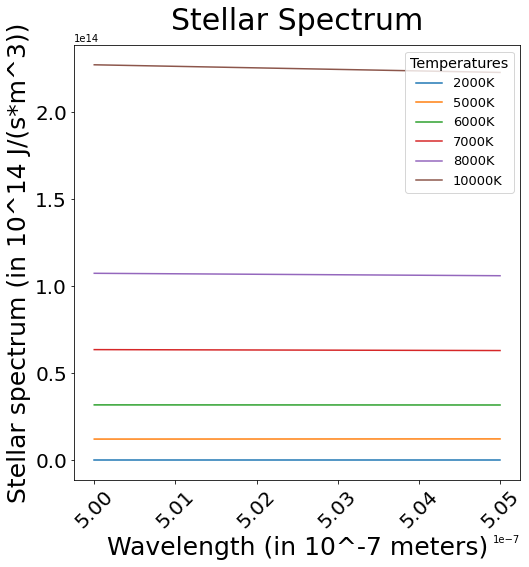

In [8]:
# part a

# we call star() for each of these temperatures and a resolution of 100
# since the resolution is the same, there will only be one λ2 and thus one wavelengths array
# we store the spectrums array of temperature T in spectrumsT
wavelengths = star(2000, 100)[0]
spectrums2000 = star(2000, 100)[1]
spectrums5000 = star(5000, 100)[1]
spectrums6000 = star(6000, 100)[1]
spectrums7000 = star(7000, 100)[1]
spectrums8000 = star(8000, 100)[1]
spectrums10000 = star(10000, 100)[1]

print("Wavelengths:", wavelengths, '\n')
print("Spectrums at 2000K:", spectrums2000, '\n')
print("Spectrums at 5000K:", spectrums5000, '\n')
print("Spectrums at 6000K:", spectrums6000, '\n')
print("Spectrums at 7000K:", spectrums7000, '\n')
print("Spectrums at 8000K:", spectrums8000, '\n')
print("Spectrums at 10000K:", spectrums10000, '\n')

# we plot each spectrum against its wavelength
plt.figure(figsize = (8, 8))
plt.plot(wavelengths, spectrums2000, label = '2000K')
plt.plot(wavelengths, spectrums5000, label = '5000K')
plt.plot(wavelengths, spectrums6000, label = '6000K')
plt.plot(wavelengths, spectrums7000, label = '7000K')
plt.plot(wavelengths, spectrums8000, label = '8000K')
plt.plot(wavelengths, spectrums10000, label = '10000K')
plt.title('Stellar Spectrum', fontsize = 30, pad = 15)
plt.xlabel('Wavelength (in 10^-7 meters)', fontsize = 25)
plt.ylabel('Stellar spectrum (in 10^14 J/(s*m^3))', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
legend = plt.legend(fontsize = 13, title = "Temperatures")
plt.setp(legend.get_title(), fontsize = 'x-large')

Wavelengths: [1.0000e-07 1.0010e-07 1.0020e-07 ... 2.9998e-06 2.9999e-06 3.0000e-06] 

Spectrums at 3000K: [1.76803928e-02 1.84556417e-02 1.92631375e-02 ... 1.24227255e+11
 1.24214848e+11 1.24202443e+11] 

Spectrums at 4000K: [2.84839876e+03 2.93789399e+03 3.02999891e+03 ... 2.11611710e+11
 2.11588549e+11 2.11565392e+11] 

Spectrums at 5000K: [3.79198067e+06 3.88311546e+06 3.97623223e+06 ... 3.04587036e+11
 3.04552060e+11 3.04517090e+11] 



[None, None]

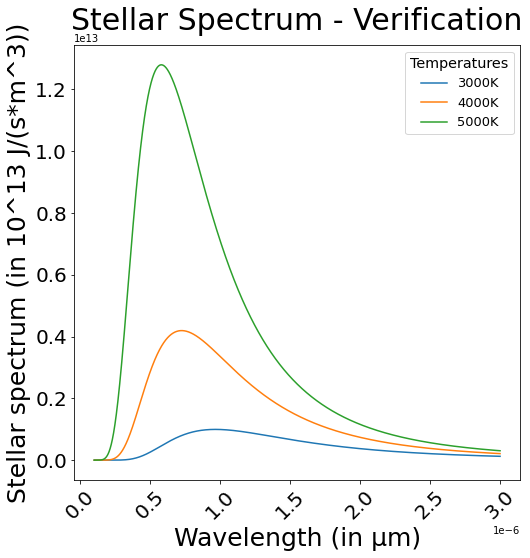

In [9]:
# part a
### verification

# for this part, i used this graph from the Planck's law wikipedia page to verify my work: 
# https://en.wikipedia.org/wiki/Planck%27s_law#/media/File:Black_body.svg
# to test that the plot makes sense, i only need to test that the function star() is working properly
# hence, i will call star() for the temperatures seen in the graph - 3000K, 4000K, and 5000K - and then plot it
# furthermore, this graph starts at λ1 = 0 µm and goes to λ2 = 3 µm
# hence, i must first tweak the constants in my star() function to have 
# lambda1 = 0.0000001 (setting it equal to 0 gives division by zero problems)
# other than that, i will change nothing
# to get lambda2 = 0.000003, i must find the corresponding resolution
# since now resolution = λ2 / (λ2 - λ1), we have resolution = 0.000003 / (0.000003 - 0.0000001) = 1.03448275862
# thus, i will be calling star() for resolution = 1.03448275862

# to summarize,
# (1) i will tweak the star() function to have λ1 = 0.0000001
# (2) i will call starVerify() for temperatures 3000K, 4000K, and 5000K and resolution = 1.03448275862
# (3) i will plot the spectrums arrays for each of these temperatures against the wavelengths array
# (4) i will compare my plot against the wikipedia graph: if they are similar, i will conclude my plot makes sense

# (1) tweak the star() function to have λ1 = 0.0000001
def starVerify(T, resolution):
    """Takes as input a temperature T and resolution and calculates the stellar spectrum/energy emitted by the star
    Input: temperature T (in K), resolution (unitless)
    Output: stellar spectrum / energy per unit wavelength (in J/(s*m^3))"""
    
    # define or calculate constants
    # since we will be calling star() with a resolution = 100, 
    # i preemptively chose a reasonable step size to make for a good number of wavelengths
    lambda1 = 0.0000001
    lambda2 = 0.0000001 * resolution / (resolution - 1)
    step = 1e-10
    h = 6.62607004e-34
    c = 299792458
    kB = 1.38064852e-23
    
    # set up wavelengths and spectrums arrays
    wavelengths = np.arange(lambda1, lambda2, step)
    spectrums = []
    
    # for each wavelength, calculate its spectrum and append the spectrum to the spectrums array
    for w in wavelengths:
        B = (2 * h * c**2) / (w**5) * 1 / (math.exp((h * c) / (w * kB * T)) - 1)
        spectrums.append(B)
    
    return wavelengths, np.array(spectrums)

# (2) call starVerify() for temperatures 3000K, 4000K, and 5000K and resolution = 1.03448275862
wavelengthsVerify = starVerify(3000, 1.03448275862)[0]
spectrums3000Verify = starVerify(3000, 1.03448275862)[1]
spectrums4000Verify = starVerify(4000, 1.03448275862)[1]
spectrums5000Verify = starVerify(5000, 1.03448275862)[1]

print("Wavelengths:", wavelengthsVerify, '\n')
print("Spectrums at 3000K:", spectrums3000Verify, '\n')
print("Spectrums at 4000K:", spectrums4000Verify, '\n')
print("Spectrums at 5000K:", spectrums5000Verify, '\n')

# (3) lot the spectrums arrays for each of these temperatures against the wavelengths array
plt.figure(figsize = (8, 8))
plt.plot(wavelengthsVerify, spectrums3000Verify, label = '3000K')
plt.plot(wavelengthsVerify, spectrums4000Verify, label = '4000K')
plt.plot(wavelengthsVerify, spectrums5000Verify, label = '5000K')
plt.title('Stellar Spectrum - Verification', fontsize = 30, pad = 15)
plt.xlabel('Wavelength (in µm)', fontsize = 25)
plt.ylabel('Stellar spectrum (in 10^13 J/(s*m^3))', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
legend = plt.legend(fontsize = 13, title = "Temperatures")
plt.setp(legend.get_title(), fontsize = 'x-large')

# (4) i will compare my plot against the wikipedia graph: if they are similar, i will conclude my plot makes sense
# they are similar indeed! since all i have done is adjust my variables and i have not adjusted any logic or functionality,
# i conclude that my plot makes sense

In [10]:
# part a
### observations

print("It's hard to glean any information from my original plot. The reason that each spectrum looks like a straight\n" +
      "line rather than curves that rise and fall is because relative to each other, the spectrums are largely\n" +
      "disproportional: the spectrum for 10000K is more than 6 times the spectrums of 2000, 5000, and 6000K. We can\n" +
      "more easily glean information from the plot above. We can see that spectrums rapidly rise for the first few\n" +
      "wavelengths and then decline from there on after. The peaks for the spectrums for 3000, 4000, and 5000K are\n" +
      "centeredaround 0.5 and 1 µm. In short, stellar spectrums are higher for lower wavelengths, " +
      "peaking around 0.5 and 1 µm.")

It's hard to glean any information from my original plot. The reason that each spectrum looks like a straight
line rather than curves that rise and fall is because relative to each other, the spectrums are largely
disproportional: the spectrum for 10000K is more than 6 times the spectrums of 2000, 5000, and 6000K. We can
more easily glean information from the plot above. We can see that spectrums rapidly rise for the first few
wavelengths and then decline from there on after. The peaks for the spectrums for 3000, 4000, and 5000K are
centeredaround 0.5 and 1 µm. In short, stellar spectrums are higher for lower wavelengths, peaking around 0.5 and 1 µm.


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

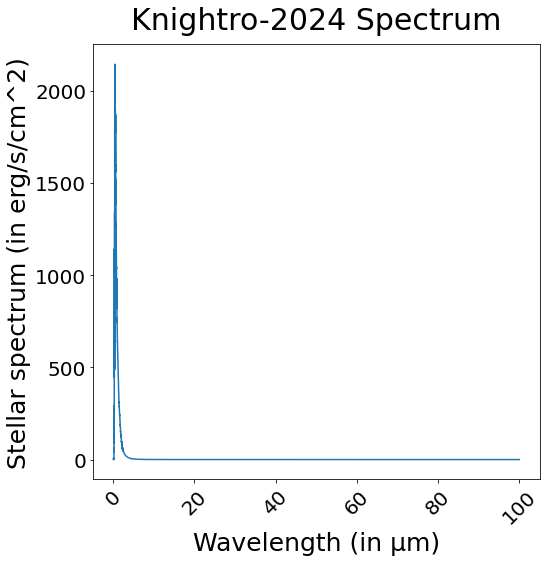

In [11]:
# part b
### subpart i
actualWavelengthData = np.loadtxt("Knightro-2024.spec")[ : , 0]
actualSpectrumData = np.loadtxt("Knightro-2024.spec")[ : , 1]
plt.figure(figsize = (8, 8))
plt.plot(actualWavelengthData, actualSpectrumData)
plt.title('Knightro-2024 Spectrum', fontsize = 30, pad = 15)
plt.xlabel('Wavelength (in µm)', fontsize = 25)
plt.ylabel('Stellar spectrum (in erg/s/cm^2)', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

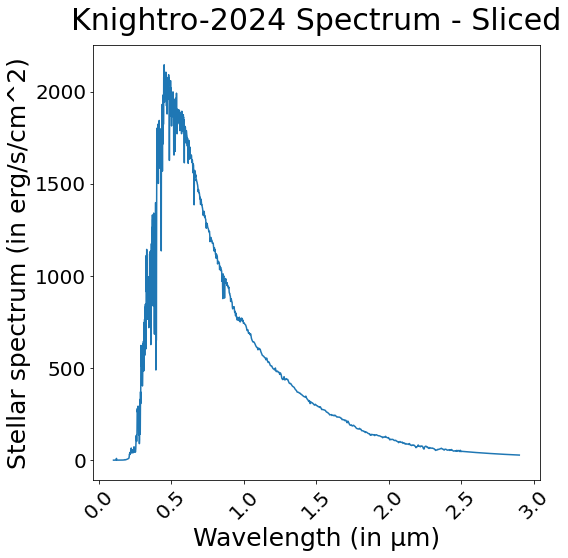

In [12]:
# part b
### subpart i
##### differences

# to get a clearer view of what's going on and see the differences with the ideal spectrum i plotted for verification, 
# i slice the data to only include wavelengths up to 3 µm - this way, we can compare the two plots
plt.figure(figsize = (8, 8))
plt.plot(actualWavelengthData[0:984], actualSpectrumData[0:984])
plt.title('Knightro-2024 Spectrum - Sliced', fontsize = 30, pad = 15)
plt.xlabel('Wavelength (in µm)', fontsize = 25)
plt.ylabel('Stellar spectrum (in erg/s/cm^2)', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)

# of course, the data looks more rough, which makes sense since it is real-world data and not idealized data.
# the peak being around 0.5 µm matches up with my verification plot. there are not any differences i can see
# with my verification plot, to be quite honest.

In [13]:
# part b
### subpart ii

# theory: the ideal spectrums at a given temperature
# observation: the actual spectrums at Knightro-2024's temperature
# fit parameter: temperature
# fitting goal: find the best-fit temperature with Knightro-2024's spectrums

# first notice that the observed spectrum is in erg/s/cm^2, while Planck's law is in J/s/m^3
# a quick wolfram alpha search reveals that 1 [(erg/s/cm^2) / m] = 0.001 J/s/m^3
# or, 1 J/s/m^3 = 1000 [(erg/s/cm^2) / m]

h = 6.62607004e-34
c = 299792458
kB = 1.38064852e-23

actualSpectrumDataConverted = 1000 * actualSpectrumData / actualWavelengthData

temperatures = np.array([3000, 4000, 5000, 6000, 7000, 8000])
chi_square = np.zeros((len(temperatures)))

for i in range(len(temperatures)):
    spectrum_theory = []
    for w in actualWavelengthData:
        B = (2 * h * c**2) / (w**5) / (math.exp((h * c) / (w * kB * temperatures[i])) - 1)
        spectrum_theory.append(B)
    spectrum_theory = np.array(spectrum_theory)
    chi_square[i] = np.sum((actualSpectrumDataConverted - spectrum_theory)**2 / spectrum_theory)

print("Chi-square array:", chi_square, '\n')
    
q = np.where(chi_square == np.min(chi_square))
print("Knightro's temperature in K:", temperatures[q[0]])

Chi-square array: [1.69417717e+25 1.27063167e+25 1.01650475e+25 8.47086970e+24
 7.26074348e+24 6.35314924e+24] 

Knightro's temperature in K: [8000]


### Problem 2

In [14]:
print("Problem 2:")

Problem 2:


In [57]:
# part a
### subpart i

# expression that calculates how much light is reflected by a surface of albedo A when it is hit by incoming flux F_in:
print("F_out = A * (F_in)")

F_out = A * (F_in)


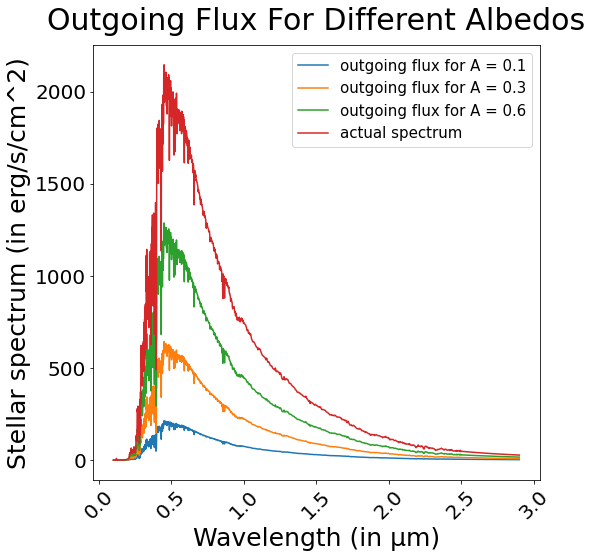

In [16]:
# part a
### subpart ii
lamda = np.arange(0.5, 10.1, 0.1)

# we plot the outgoing fluxes against the wavelengths
# notice we slice the wavelength and spectrum data up to index 984
# much like with problem 1, part b, subpart i, we keep it to index 984 because from there on out,
# the wavelengths rapidly accelerate to 100 in only 62/1046 indices, and the meat of the nonzero data
# is between 0 and 3 µm
plt.figure(figsize = (8, 8))
plt.plot(actualWavelengthData[0:984], 0.1 * actualSpectrumData[0:984], label = "outgoing flux for A = 0.1")
plt.plot(actualWavelengthData[0:984], 0.3 * actualSpectrumData[0:984], label = "outgoing flux for A = 0.3")
plt.plot(actualWavelengthData[0:984], 0.6 * actualSpectrumData[0:984], label = "outgoing flux for A = 0.6")
plt.plot(actualWavelengthData[0:984], actualSpectrumData[0:984], label = "actual spectrum")
plt.title('Outgoing Flux For Different Albedos', fontsize = 30, pad = 15)
plt.xlabel('Wavelength (in µm)', fontsize = 25)
plt.ylabel('Stellar spectrum (in erg/s/cm^2)', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
plt.legend(fontsize = 15)

Interpolated spectrums: [450.20627927 456.82306737 637.25416387 ...  57.46467378  56.66011465
  55.73998868] 

Flux after being reflected off of a forest surface: [22.2762067  22.60360537 31.61417907 ...  3.92656116  3.86365322
  3.79645063] 



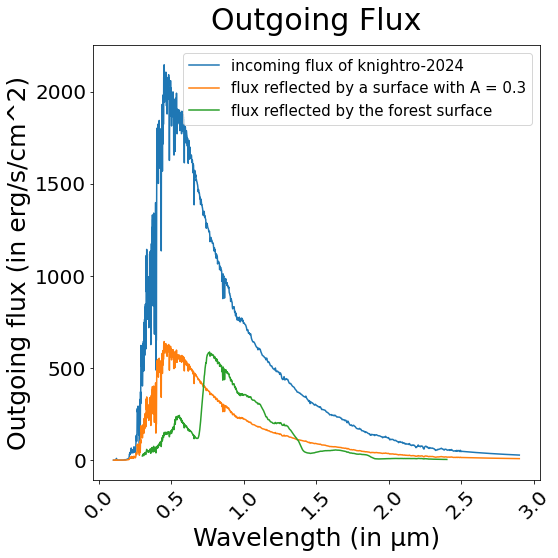

In [17]:
# part b
forestSurfaceData = np.genfromtxt('forest_surface.dat', comments = '#')

# interpolate the spectrums of knightro-2024 from knightro-2024.spec from the wavelengths from forest_surface.dat
# first, we store the wavelengths from forest_surface.dat
# then we use scipy's interp1d function to interpolate the spectrums of forest_surface.dat's wavelengths,
# by using the data in knightro-2024.spec
forestSurfaceWavelengths = forestSurfaceData[ : , 0]
f_cubic = interp1d(actualWavelengthData, actualSpectrumData, kind = 'cubic')
forestSurfaceInterpolatedSpectrums = f_cubic(forestSurfaceWavelengths)
print("Interpolated spectrums:", forestSurfaceInterpolatedSpectrums, '\n')

# the flux of knightro-2024 that escapes to space after being reflected off of a forest surface at all wavelengths:
forestSurfaceAlbedos = forestSurfaceData[ : , 1]
knightroForestReflectedFlux = forestSurfaceAlbedos * forestSurfaceInterpolatedSpectrums
print("Flux after being reflected off of a forest surface:", knightroForestReflectedFlux, '\n')

# plot of (1) incoming flux from knightro-2024, (2) the flux reflected by a surface with A = 0.3, and
# (3) the flux reflected by the forest surface
plt.figure(figsize = (8, 8))
plt.plot(actualWavelengthData[0:984], actualSpectrumData[0:984], label = "incoming flux of knightro-2024")
plt.plot(actualWavelengthData[0:984], 0.3 * actualSpectrumData[0:984], label = "flux reflected by a surface with A = 0.3")
plt.plot(forestSurfaceWavelengths, knightroForestReflectedFlux, label = "flux reflected by the forest surface")
plt.title('Outgoing Flux', fontsize = 30, pad = 15)
plt.xlabel('Wavelength (in µm)', fontsize = 25)
plt.ylabel('Outgoing flux (in erg/s/cm^2)', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
plt.legend(fontsize = 15)

In [18]:
# part c (mistakenly labeled part b in the instruction document)
### subpart i

# expression that calculates the amount of light F_out coming through the
# other side of a cloud with optical thickness τ, for incoming amount of light F_in:
# F_out = F_in * exp(-tau)
print("F_out = F_in * exp(-τ)\n")

tau = tuple(np.arange(0, 100.5, 0.5))

# after the light of Knightro-2024 passes once through a cloud,
# the incoming amount of light F_in is the 'actual' spectrum of Knightro-2024
# thus, we need the spectrum of Knightro-2024 at λ = 0.7 µm and at λ = 1.1 µm
# to obtain these, we once again interpolate using scipy's interp1d
f_cubic = interp1d(actualWavelengthData, actualSpectrumData, kind = 'cubic')
knightroInterpolatedSpectrums = f_cubic([0.7, 1.1])
knightroInterpolatedSpectrums1 = knightroInterpolatedSpectrums[0] # spectrum at 0.7 µm
knightroInterpolatedSpectrums2 = knightroInterpolatedSpectrums[1] # spectrum at 1.1 µm

print("Interpolated spectrum of λ = 0.7 µm:", knightroInterpolatedSpectrums1, '\n')
print("Interpolated spectrum of λ = 1.1 µm:", knightroInterpolatedSpectrums2, '\n')

# the outgoing flux at λ µm is F_in * exp(-tau), where F_in is the interpolated spectrum at λ
# to use numpy's array operations, we create a numpy array out of the tau tuple
# finally, we have our outgoing fluxes:
outgoingFlux1 = knightroInterpolatedSpectrums1 * np.exp(-np.array(tau))
outgoingFlux2 = knightroInterpolatedSpectrums2 * np.exp(-np.array(tau))

print("Outgoing flux at 0.7 µm after the light of Knightro-2024 passes once through a cloud of thickness tau:", '\n', outgoingFlux1, '\n')
print("Outgoing flux at 1.1 µm after the light of Knightro-2024 passes once through a cloud of thickness tau:", '\n', outgoingFlux2)

F_out = F_in * exp(-τ)

Interpolated spectrum of λ = 0.7 µm: 1409.4522666441208 

Interpolated spectrum of λ = 1.1 µm: 603.1424405250006 

Outgoing flux at 0.7 µm after the light of Knightro-2024 passes once through a cloud of thickness tau: 
 [1.40945227e+03 8.54876013e+02 5.18508512e+02 3.14491310e+02
 1.90748622e+02 1.15694887e+02 7.01724964e+01 4.25617705e+01
 2.58150187e+01 1.56576004e+01 9.49681467e+00 5.76010927e+00
 3.49368287e+00 2.11902578e+00 1.28525410e+00 7.79546019e-01
 4.72818561e-01 2.86778954e-01 1.73940228e-01 1.05500081e-01
 6.39890339e-02 3.88113110e-02 2.35402500e-02 1.42778834e-02
 8.65997403e-03 5.25253976e-03 3.18582641e-03 1.93230139e-03
 1.17200004e-03 7.10853956e-04 4.31154719e-04 2.61508556e-04
 1.58612957e-04 9.62036215e-05 5.83504460e-05 3.53913345e-05
 2.14659295e-05 1.30197444e-05 7.89687414e-06 4.78969628e-06
 2.90509765e-06 1.76203079e-06 1.06872570e-06 6.48214903e-07
 3.93162213e-07 2.38464936e-07 1.44636295e-07 8.77263475e-08
 5.32087194e-08 3.227271

In [19]:
# part c
### subpart ii

# the process
# 1. the light of knightro-2024 passes through a cloud A of optical thickness τ
# 2. then the light reflects on the surface of albedo A
# 3. then either:
    # a. passes through another cloud B of optical thickness τ2 (P ≥ 0.5)
    # b. reflects off cloud B (assume perfect reflection) (P < 0.5)
# 4. then:
    # a. if the light passes through cloud B (P ≥ 0.5), then the cloud goes off to space and the process stops
    # b. if the light reflects off cloud B (P < 0.5), then
        # i. steps 2 and 3 are repeated (this can be repeated up to 4 times)
        # ii. if 4 repetitions have happened (4 times that the light reflects off cloud B),
            # then step 2 and 3(a) happens and the light leaves to space
            
# the equations
# 1. F_out_cloudA = F_in * exp(-τ) = [actual spectrum of knightro-2024 at λ] * exp(-τ)
# 2. F_out_surfaceReflect = A * F_in = A * F_out_cloudA
# 3. either:
    # a. P ≥ 0.5: F_out_throughCloud = F_in * exp(-τ2) = F_out_surfaceReflect * exp(-τ2)
    # b. P < 0.5: F_out_cloudReflect = F_in = F_out_surfaceReflect (perfect reflection: outgoing light = incoming light)
# 4. then:
    # a. F_out_final = F_out_throughCloud
    # b. repetition 1:
        # i. F_out_surfaceReflect = A * F_in = A * F_out_cloudReflect, and either:
            # P ≥ 0.5: i-1. F_out_throughCloud = F_in * exp(-τ2) = F_out_surfaceReflect * exp(-τ2)
            # P < 0.5: i-2. F_out_cloudReflect = F_in = F_out_surfaceReflect
        # ii. if i-1, then F_out_final = F_out_throughCloud ; if i-2, repetition 2
    # c. repetition 2:
        # i. F_out_surfaceReflect = A * F_in = A * F_out_cloudReflect, and either:
            # P ≥ 0.5: i-1. F_out_throughCloud = F_in * exp(-τ2) = F_out_surfaceReflect * exp(-τ2)
            # P < 0.5: i-2. F_out_cloudReflect = F_in = F_out_surfaceReflect
        # ii. if i-1, then F_out_final = F_out_throughCloud ; if i-2, repetition 3
    # d. repetition 3:
        # i. F_out_surfaceReflect = A * F_in = A * F_out_cloudReflect, and either:
            # P ≥ 0.5: i-1. F_out_throughCloud = F_in * exp(-τ2) = F_out_surfaceReflect * exp(-τ2)
            # P < 0.5: i-2. F_out_cloudReflect = F_in = F_out_surfaceReflect
        # ii. if i-1, then F_out_final = F_out_throughCloud ; if i-2, repetition 4
    # e. repetition 4:
        # i. F_out_surfaceReflect = A * F_in = A * F_out_cloudReflect, and either:
            # P ≥ 0.5: i-1. F_out_throughCloud = F_in * exp(-τ2) = F_out_surfaceReflect * exp(-τ2)
            # P < 0.5: i-2. F_out_cloudReflect = F_in = F_out_surfaceReflect
        # ii. if i-1, then F_out_final = F_out_throughCloud ; if i-2, repetition 5
    # f. repetition 5:
        # i. F_out_surfaceReflect = A * F_in = A * F_out_cloudReflect
        # ii. F_out_throughCloud = F_in * exp(-τ2) = F_out_surfaceReflect * exp(-τ2)
        # iii. F_out_final = F_out_throughCloud

def base_model(λ, τ, surfaceName, A, τ2):
    """Calculates the outgoing light (to space) from Knightro-2024 b, after the light
    of Knightro-2024 passes through a cloud A of optical thickness τ, reflects on the
    surface of albedo A and then either passes through another cloud B of optical
    thickness τ2 or reflects off cloud B (assume perfect reflection), then reflects off
    the surface with albedo A and then again either passes through cloud B of 
    optical thickness or reflects off cloud B, etc.
    This process can repeat up to 5 times. On the 5th time the light will pass through
    the cloud of optical thickness and leave to space.
    Input: wavelength λ (in microns), cloud A's optical thickness τ, 
           the surface's name surfaceName, the surface's albedo A, cloud B's optical thickness τ2
    Output: outgoing light (in erg/s/cm^2)"""
    
    # first the light of knightro-2024 passes through a cloud A of optical thickness τ
    # the outgoing light F_out = F_in * exp(-τ)
    # where F_in is the actual spectrum of knightro-2024 at λ
    # we cannot assume that there exists an actual spectrum of knightro-2024 at the given wavelength,
    # so we must interpolate it - we use the method in the previous subpart
    f_cubic = interp1d(actualWavelengthData, actualSpectrumData, kind = 'cubic')
    knightroInterpolatedSpectrum = f_cubic(λ)
    
    # now we have the incoming light F_in, so we can calculate the outgoing light after passing through cloud A
    F_out_cloudA = knightroInterpolatedSpectrum * math.exp(-τ)
    print("The light has passed through the cloud of optical thickness τ = " + str(τ) + 
          " with an amount of " + str(F_out_cloudA) + " erg/s/cm^2.")
    
    # next, the light reflects off the surface of albedo A
    # F_out = A * F_in, and here the incoming light is the outgoing light after passing through cloud A
    F_out_surfaceReflect = A * F_out_cloudA
    print("The light has reflected off of " + surfaceName + " (albedo A = " + str(A) + 
          ") with an amount of " + str(F_out_surfaceReflect) + " erg/s/cm^2.")
    
    # now either the light passes through the cloud or reflects back on the surface
    # we use random.random() as our random number generator, 
    # which, according to python documentation, "return the next random floating point number in the range [0.0, 1.0)"
    P = random.random()
    
    # if P ≥ 0.5, then the light passes through the cloud and this outgoing light is returned
    # otherwise (P < 0.5), the light reflects off the cloud with perfect reflection, so outgoing light = incoming light
    if P >= 0.5:
        F_out_throughCloud = F_out_surfaceReflect * math.exp(-τ2)
        print("The light has passed through the cloud of optical thickness τ2 = " + str(τ2) + 
              " with an amount of " + str(F_out_throughCloud) + " erg/s/cm^2.")
        return F_out_throughCloud
    else:
        F_out_cloudReflect = F_out_surfaceReflect
        print("The light has reflected off of the cloud of optical thickness τ2 = " + str(τ2) + 
              " with an amount of " + str(F_out_cloudReflect) + " erg/s/cm^2.")
    
    # here, we will use the variable 'numRepetitions' as a counter for the number of repetitions
    # since the code has reached this point, the light reflected off cloud B, so we begin with our first repetition
    numRepetitions = 1
    
    # first the light reflects off the surface of albedo A
    # then we generate a random number, and follow the conditional flow of before
    while numRepetitions < 5:
        F_out_surfaceReflect = A * F_out_cloudReflect
        print("The light has reflected off of " + surfaceName + " (albedo A = " + str(A) + 
              ") with an amount of " + str(F_out_surfaceReflect) + " erg/s/cm^2.")
        
        P = random.random()
        
        if P >= 0.5:
            F_out_throughCloud = F_out_surfaceReflect * math.exp(-τ2)
            print("The light has passed through the cloud of optical thickness τ2 = " + str(τ2) + 
                  " with an amount of " + str(F_out_throughCloud) + " erg/s/cm^2.")
            return F_out_throughCloud
        else:
            F_out_cloudReflect = F_out_surfaceReflect
            print("The light has reflected off of the cloud of optical thickness τ2 = " + str(τ2) + 
                  " with an amount of " + str(F_out_cloudReflect) + " erg/s/cm^2.")
        
        numRepetitions += 1
        
    # if the compiler reaches this point, then the number of repetitions has reached 5
    # at this point, the light *will* pass through cloud B
    F_out_surfaceReflect = A * F_out_cloudReflect
    print("The light has reflected off of " + surfaceName + " (which has albedo A = " + str(A) + 
          ") with an amount of " + str(F_out_surfaceReflect) + " erg/s/cm^2.")
    
    F_out_throughCloud = F_out_surfaceReflect * math.exp(-τ2)
    print("The light has passed through the cloud of optical thickness τ2 = " + str(τ2) + 
          " with an amount of " + str(F_out_throughCloud) + " erg/s/cm^2.")
    
    return F_out_throughCloud

In [20]:
# part c
### subpart iii

# since base_model() is probabilistic and the given situation in this subpart is deterministic,
# we will run base_model() 3 times and see if the given situation happens, which we will know through the print statements

print("Using simulations of base_model() to directly determine the outgoing light of the given situation:\n")

# run 1
print("Run 1:")
run1 = base_model(0.5, 12, "Knightro-2024 b", 0.3, 10)
print("The final outgoing light of this run is " + str(run1) + " erg/s/cm^2.")
print("---------------------------------------------------------------------")
# here, the light reflected off the cloud twice before passing through it (desired situation)

# run 2
print("Run 2:")
run2 = base_model(0.5, 12, "Knightro-2024 b", 0.3, 10)
print("The final outgoing light of this run is " + str(run2) + " erg/s/cm^2.")
print("---------------------------------------------------------------------")
# here, the light passed through the cloud immediately

# run 3
print("Run 3:")
run3 = base_model(0.5, 12, "Knightro-2024 b", 0.3, 10)
print("The final outgoing light of this run is " + str(run3) + " erg/s/cm^2.")
# here, the light passed through the cloud immediately

# since i know that these runs will not produce the same numbers when you run it for grading,
# i have kept a screenshot of my results in finalproject_zachariahabueg/finalproject_zachariahabueg_prob2_screenshot1.png

# thus, the outgoing light of the given situation is 1.4581332482935087e-08 erg/s/cm^2

# ----------------------------------------------------------------------------------

# alternatively, we could have indirectly used base_model() to calculate the outgoing light of the given situation
# by making the calculations in base_model() ourselves and ignoring the random number generator

print("\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" + 
      "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" + 
      "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" + 
      "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n")

print("Using the calculations of base_model() to indirectly determine the outgoing light of the given situation:\n")

# first the light of knightro-2024 passes through a cloud A of optical thickness τ = 12
# the outgoing light F_out = F_in * exp(-12)
# where F_in is the actual spectrum of knightro-2024 at λ = 0.5µm
# we cannot assume that there exists an actual spectrum of knightro-2024 at the given wavelength,
# so we must interpolate it - we use the method in the previous subpart
f_cubic = interp1d(actualWavelengthData, actualSpectrumData, kind = 'cubic')
knightroInterpolatedSpectrum = f_cubic(0.5)
print("The spectrum of Knightro-2024 at 0.5µm is " + str(knightroInterpolatedSpectrum) + " erg/s/cm^2.")

# now we have the incoming light F_in, so we can calculate the outgoing light after passing through cloud A
F_out_cloudA = knightroInterpolatedSpectrum * math.exp(-12)
print("The light has passed through the cloud of optical thickness τ = 10" +
      " with an amount of " + str(F_out_cloudA) + " erg/s/cm^2.")

# next, the light reflects off Knightro-2024 b, with albedo A = 0.3
# F_out = A * F_in, and here the incoming light is the outgoing light after passing through cloud A
F_out_surfaceReflect = 0.3 * F_out_cloudA
print("The light has reflected off of Knightro-2024 b (albedo A = 0.3)" + 
      " with an amount of " + str(F_out_surfaceReflect) + " erg/s/cm^2.")

# next, the light reflects off cloud B with perfect reflection (first time), so outgoing light = incoming light
F_out_cloudReflect = F_out_surfaceReflect
print("The light has reflected off of the cloud of optical thickness τ2 = 10" + 
      " with an amount of " + str(F_out_cloudReflect) + " erg/s/cm^2.")

# once more, the light reflects off the Knightro-2024 b
F_out_surfaceReflect = 0.3 * F_out_cloudReflect
print("The light has reflected off of Knightro-2024 b (albedo A = 0.3)" + 
      " with an amount of " + str(F_out_surfaceReflect) + " erg/s/cm^2.")

# once more, the light reflects off cloud B with perfect reflection (second time)
F_out_cloudReflect = F_out_surfaceReflect
print("The light has reflected off of the cloud of optical thickness τ2 = 10" + 
      " with an amount of " + str(F_out_cloudReflect) + " erg/s/cm^2.")

# one last time, the light reflects off the Knightro-2024 b
F_out_surfaceReflect = 0.3 * F_out_cloudReflect
print("The light has reflected off of Knightro-2024 b (albedo A = 0.3)" + 
      " with an amount of " + str(F_out_surfaceReflect) + " erg/s/cm^2.")

# finally, the light passes through cloud B
F_out_throughCloud = F_out_surfaceReflect * math.exp(-10)
print("The light has passed through the cloud of optical thickness τ2 = 10" + 
      " with an amount of " + str(F_out_throughCloud) + " erg/s/cm^2.")
print("The final outgoing light of this situation is " + str(F_out_throughCloud) + " erg/s/cm^2.")

# thus, the outgoing light of the given situation is 1.4581332482935087e-08 erg/s/cm^2

Using simulations of base_model() to directly determine the outgoing light of the given situation:

Run 1:
The light has passed through the cloud of optical thickness τ = 12 with an amount of 0.011895378562150883 erg/s/cm^2.
The light has reflected off of Knightro-2024 b (albedo A = 0.3) with an amount of 0.0035686135686452645 erg/s/cm^2.
The light has passed through the cloud of optical thickness τ2 = 10 with an amount of 1.6201480536594544e-07 erg/s/cm^2.
The final outgoing light of this run is 1.6201480536594544e-07 erg/s/cm^2.
---------------------------------------------------------------------
Run 2:
The light has passed through the cloud of optical thickness τ = 12 with an amount of 0.011895378562150883 erg/s/cm^2.
The light has reflected off of Knightro-2024 b (albedo A = 0.3) with an amount of 0.0035686135686452645 erg/s/cm^2.
The light has passed through the cloud of optical thickness τ2 = 10 with an amount of 1.6201480536594544e-07 erg/s/cm^2.
The final outgoing light of thi

### Problem 3

In [21]:
print("Problem 3:")

Problem 3:


The radius of Knightro-2024 b is 0.78233311 Earth radii.
The radius of Knightro-2024 c is 0.92101739 Earth radii.


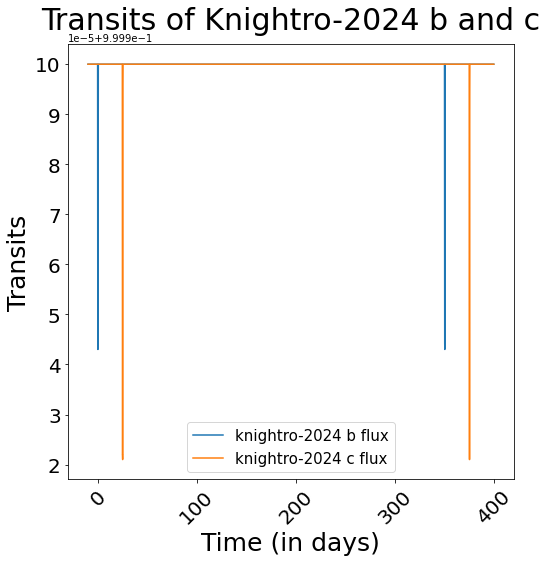

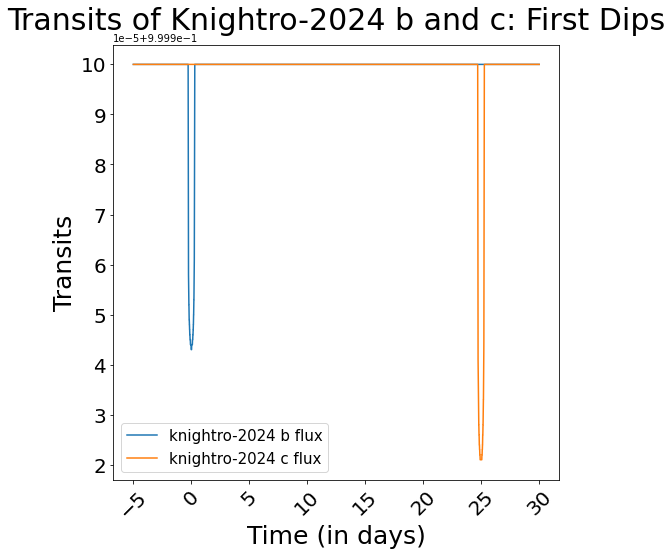

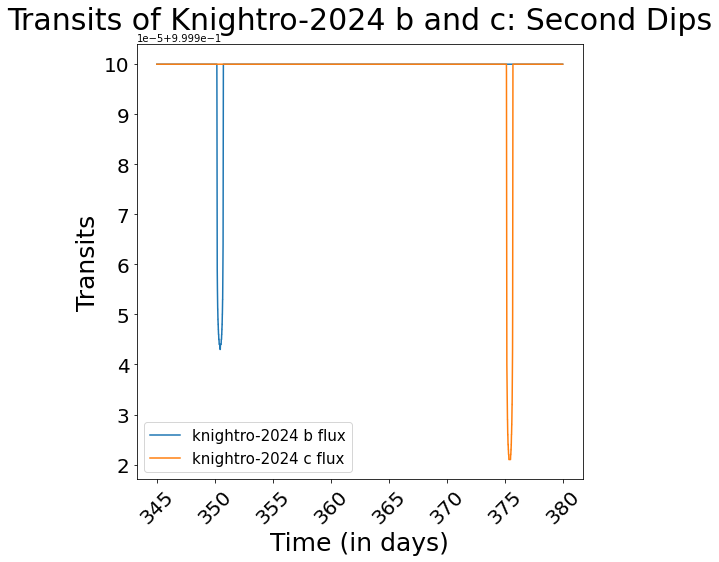

In [22]:
# part a
time = np.loadtxt("planet_lightcurves.dat")[ : , 0]
knightroB_flux = np.loadtxt("planet_lightcurves.dat")[ : , 1]
knightroC_flux = np.loadtxt("planet_lightcurves.dat")[ : , 2]

plt.figure(figsize = (8, 8))
plt.plot(time, knightroB_flux, label = "knightro-2024 b flux")
plt.plot(time, knightroC_flux, label = "knightro-2024 c flux")
plt.title('Transits of Knightro-2024 b and c', fontsize = 30, pad = 15)
plt.xlabel('Time (in days)', fontsize = 25)
plt.ylabel('Transits', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
plt.legend(fontsize = 15)

plt.figure(figsize = (8, 8))
plt.plot(time[1219 : 9755], knightroB_flux[1219 : 9755], label = "knightro-2024 b flux")
plt.plot(time[1219 : 9755], knightroC_flux[1219 : 9755], label = "knightro-2024 c flux")
plt.title('Transits of Knightro-2024 b and c: First Dips', fontsize = 30, pad = 15)
plt.xlabel('Time (in days)', fontsize = 25)
plt.ylabel('Transits', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
plt.legend(fontsize = 15)

plt.figure(figsize = (8, 8))
plt.plot(time[86585 : 95121], knightroB_flux[86585 : 95121], label = "knightro-2024 b flux")
plt.plot(time[86585 : 95121], knightroC_flux[86585 : 95121], label = "knightro-2024 c flux")
plt.title('Transits of Knightro-2024 b and c: Second Dips', fontsize = 30, pad = 15)
plt.xlabel('Time (in days)', fontsize = 25)
plt.ylabel('Transits', fontsize = 25)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
plt.legend(fontsize = 15)

# now we must identify the depths of the transits of knightro-2024 b and c
# the depth of a transit is defined as the difference between the continuum and the minimum of light from the system
# the minimum of light from knightro-2024 b is 0.999943,
# so the depth of knightro-2024 b's transit is d_b = 1.0 - 0.999943 = 0.000057
# the minimum of light from knightro-2024 c is 0.999921,
# so the depth of knightro-2024 c's transit is d_c = 1.0 - 0.999921 = 0.000079
# now, we will convert knightro-2024's radius from units of solar radii into units of Earth radii
# according to the International Astronomical Union here - https://arxiv.org/pdf/1510.07674.pdf - 
# 1 solar radius = 6.957 * 10^8 m
# 1 Earth equatorial radius = 6.3781 * 10^6 m
# thus, 1 solar radius = (6.957 * 10^8) / (6.3781 * 10^6) = 109.076370706 Earth radii
# so Knightro-2024's 0.95 solar radii = 0.95 * 109.076370706 = 103.6225521707 Earth radii
# finally, we solve for the radii of Knightro-2024 b and Knightro-2024 c
# solving the depth equation for R_planet, we have R_planet = R_star * √d, where R_star = 103.6225521707 Earth radii

# the radius of Knightro-2024 b = 103.6225521707 * √(d_b) = 103.6225521707 * √0.000057 = 0.78233311 Earth radii
# the radius of Knightro-2024 c = 103.6225521707 * √(d_c) = 103.6225521707 * √0.000079 = 0.92101739 Earth radii

print("The radius of Knightro-2024 b is 0.78233311 Earth radii.")
print("The radius of Knightro-2024 c is 0.92101739 Earth radii.")

In [23]:
# part b

# to calculate the orbital period, we will take the first instance of time at which the minimum of the transit occurs
# (since the minimum of a transit in a single dip spans over several values of time) for each dip

# for knightro-2024 b, the first dip hits a minimum starting at -0.016400 days
# and the second dip hits a minimum starting at 350.442804 days,
# for an orbital period of 350.442804 - (-0.016400) = 350.459204 days
print("The orbital period of Knightro-2024 b is 350.459204 days.")

# for knightro-2024 c, the first dip hits a minimum starting at 24.895449 days
# and the second dip hits a minimum starting at 375.350554 days,
# for an orbital period of 375.350554 - 24.895449 = 350.455105 days
print("The orbital period of Knightro-2024 c is 350.455105 days.")

# to find the orbital distance of knightr-2024 b and c from their parent star, we use kepler's law
# here, i "import" the function kepler_3rd() from hw7_zachariahabueg/hw7_support_funct.py
def kepler_3rd(period) :
    """Takes as input the orbital period of a planet in days 
    and returns the orbital distance of a planet to the Sun.
    Input: orbital period (days)
    Output: orbital distance (astronomical units)"""
    
    period_earth = 1
    period_planet = period / 365.25 # planet periods are given in days, which must be converted to Earth years
    distance_earth = 1
    
    # we rewrite the equation (P_1)^2 / (P_2)^2 = (a_1)^3 / (a_2)^3 in terms of a_2
    # this gives us a_2 = cube root [ (P_2)^2 * (a_1)^3 / (P_1)^2 ]
    
    distance_planet =  (period_planet**2 * distance_earth**3 / period_earth**2) ** (1. / 3)
    return distance_planet

# now we define variables for each planet's orbital period and call the function to find their orbital distances
orbitalPeriodB = 350.459204
orbitalPeriodC = 350.455105
orbitalDistanceB = kepler_3rd(orbitalPeriodB)
orbitalDistanceC = kepler_3rd(orbitalPeriodC)

print("The orbital distance of Knightro-2024 b from its parent star Knigtro-2024 is", orbitalDistanceB, "AU.")
print("The orbital distance of Knightro-2024 c from its parent star Knigtro-2024 is", orbitalDistanceC, "AU.")

The orbital period of Knightro-2024 b is 350.459204 days.
The orbital period of Knightro-2024 c is 350.455105 days.
The orbital distance of Knightro-2024 b from its parent star Knigtro-2024 is 0.9728177745165248 AU.
The orbital distance of Knightro-2024 c from its parent star Knigtro-2024 is 0.9728101890633338 AU.


In [36]:
# part c
### subpart i
modelRuns = pickle.load(open('model_runs.pickle', 'rb'))

# let's store the data from each key
modelRunsWavelengths = modelRuns['wavelength']
forest_clear_flux = modelRuns['forest_clear_atmosphere.dat']
forest_t10_flux = modelRuns['forest_t10_atmosphere.dat']
grass_clear_flux = modelRuns['grass_clear_atmosphere.dat']
grass_t10_flux = modelRuns['grass_t10_atmosphere.dat']
ice_clear_flux = modelRuns['ice_clear_atmosphere.dat']
ice_t10_flux = modelRuns['ice_t10_atmosphere.dat']
ocean_clear_flux = modelRuns['ocean_clear_atmosphere.dat']
ocean_t30_flux = modelRuns['ocean_t30_atmosphere.dat']
sand_clear_flux = modelRuns['sand_clear_atmosphere.dat']
sand_t10_flux = modelRuns['sand_t10_atmosphere.dat']

# finally, to make iterating through the data easier for fitting, we store all of the data in a single array of fluxes
modelRunsFlux = ([forest_clear_flux, forest_t10_flux, 
                  grass_clear_flux, grass_t10_flux,
                  ice_clear_flux, ice_t10_flux,
                  ocean_clear_flux, ocean_t30_flux,
                  sand_clear_flux, sand_t10_flux])

In [25]:
# part c
### subpart ii
knightroBC_photometry = np.loadtxt("knightro_2024_bc_photometry.dat")
knightroBC_photometryWavelengths = knightroBC_photometry[ : , 0]
knightroBC_photometryFluxB = knightroBC_photometry[ : , 1]
knightroBC_photometryFluxC = knightroBC_photometry[ : , 2]

In [38]:
# part c
### subpart iii

# first we must interpolate the fluxes of the models from the wavelengths of the observations
# we use scipy's interp1d function to interpolate the fluxes of the models at the wavelengths given in the observations
# we use the data in model_runs.pickle, and we interpolate for each model
# just like with modelRunsFlux, we store all of the interpolated fluxes in a single array of interpolated fluxes

modelInterpolatedFluxes = []

for i in range(len(modelRunsFlux)):
    f_cubic = interp1d(modelRunsWavelengths, modelRunsFlux[i], kind = 'cubic')
    interpolatedFluxesPerModel = f_cubic(knightroBC_photometryWavelengths)
    modelInterpolatedFluxes.append(interpolatedFluxesPerModel)

# now we have adjusted the models' data to be in line with the photometry observation wavelengths
modelInterpolatedFluxes = np.array(modelInterpolatedFluxes)

# we are now ready to fit the (interpolated) fluxes of the models to the photometry observations
# for each planet, we do 2 separate runs: 1 cloudless and 1 clouded
# the idea is that if a fitting includes one surface, then it will not include the same surface
# for instance, if a fitting includes forest_clear_atmosphere, it will not include forest_t10_atmosphere
# first, we will begin with defining the parameter space

In [52]:
# each of these is 100 points evenly spaced from 0 to 1
a1 = np.linspace(0, 1, 40)
a2 = np.linspace(0, 1, 40)
a3 = np.linspace(0, 1, 40)
a4 = np.linspace(0, 1, 40)
a5 = np.linspace(0, 1, 40)

# say a1 = 0.3
# then a2 can be up to 1 - 0.3 = 0.7
# say a2 = 0.1
# then a3 can be up to 1 - 0.3 - 0.1 = 0.6
# say a3 = 0.4
# then a4 can be up to 1 - 0.3 - 0.1 - 0.4 = 0.2
# say a4 = 0.15
# then a5 must be 1 - 0.3 - 0.1 - 0.4 - 0.15 = 0.05

# say a1 = 0.4
# then a2 can be up to 1 - 0.4 = 0.6
# say a2 = 0.2
# then a3 can be up to 1 - 0.4 - 0.2 = 0.4
# say a3 = 0.4
# then a4 = a5 = 0

chi_square_1 = np.zeros([len(a1), len(a2), len(a3), len(a4), len(a5)])
chi_square_2 = np.zeros([len(a1), len(a2), len(a3), len(a4), len(a5)])
chi_square_3 = np.zeros([len(a1), len(a2), len(a3), len(a4), len(a5)])
chi_square_4 = np.zeros([len(a1), len(a2), len(a3), len(a4), len(a5)])

# knightro-2024 b: cloudless
for i in range(len(a1)):
    for j in range(len(a2)):
        if 1 - a1[i] > 0:
            for k in range(len(a3)):
                if 1 - a1[i] - a2[j] > 0:
                    for l in range(len(a4)):
                        if 1 - a1[i] - a2[j] - a3[k] > 0:
                            for m in range(len(a5)):
                                if (1 - a1[i] - a2[j] - a3[k] - a4[l] > 0) and (a5[m] == 1 - a1[i] - a2[j] - a3[k] - a4[l]):
                                    fluxB_theory = (a1[i] * modelInterpolatedFluxes[0] + 
                                                    a2[j] * modelInterpolatedFluxes[2] + 
                                                    a3[k] * modelInterpolatedFluxes[4] +
                                                    a4[l] * modelInterpolatedFluxes[6] + 
                                                    a5[m] * modelInterpolatedFluxes[8])
                                    chi_square_1[i, j, k, l, m] = np.sum((knightroBC_photometryFluxB - fluxB_theory)**2 / fluxB_theory)

# best fit parameters for knightro-2024 b: cloudless
q = np.where(chi_square_1 == np.min(chi_square_1))
print("Best fit parameters for Knightro-2024 b (cloudless):")
print(a1[q[0]], a2[q[1]], a3[q[2]], a4[q[3]], a5[q[4]])
print("---------------------------------------------------------------------------------------------")

# knightro-2024 b: clouded
for i in range(len(a1)):
    for j in range(len(a2)):
        if 1 - a1[i] > 0:
            for k in range(len(a3)):
                if 1 - a1[i] - a2[j] > 0:
                    for l in range(len(a4)):
                        if 1 - a1[i] - a2[j] - a3[k] > 0:
                            for m in range(len(a5)):
                                if (1 - a1[i] - a2[j] - a3[k] - a4[l] > 0) and (a5[m] == 1 - a1[i] - a2[j] - a3[k] - a4[l]):
                                    fluxB_theory = (a1[i] * modelInterpolatedFluxes[1] + 
                                                    a2[j] * modelInterpolatedFluxes[3] + 
                                                    a3[k] * modelInterpolatedFluxes[5] +
                                                    a4[l] * modelInterpolatedFluxes[7] + 
                                                    a5[m] * modelInterpolatedFluxes[9])
                                    chi_square_2[i, j, k, l, m] = np.sum((knightroBC_photometryFluxB - fluxB_theory)**2 / fluxB_theory)
                                    
# best fit parameters for knightro-2024 b: clouded
r = np.where(chi_square_2 == np.min(chi_square_2))
print("Best fit parameters for Knightro-2024 b (clouded):")
print(a1[r[0]], a2[r[1]], a3[r[2]], a4[r[3]], a5[r[4]])
print("---------------------------------------------------------------------------------------------")

# knightro-2024 c: cloudless
for i in range(len(a1)):
    for j in range(len(a2)):
        if 1 - a1[i] > 0:
            for k in range(len(a3)):
                if 1 - a1[i] - a2[j] > 0:
                    for l in range(len(a4)):
                        if 1 - a1[i] - a2[j] - a3[k] > 0:
                            for m in range(len(a5)):
                                if (1 - a1[i] - a2[j] - a3[k] - a4[l] > 0) and (a5[m] == 1 - a1[i] - a2[j] - a3[k] - a4[l]):
                                    fluxC_theory = (a1[i] * modelInterpolatedFluxes[0] + 
                                                    a2[j] * modelInterpolatedFluxes[2] + 
                                                    a3[k] * modelInterpolatedFluxes[4] +
                                                    a4[l] * modelInterpolatedFluxes[6] + 
                                                    a5[m] * modelInterpolatedFluxes[8])
                                    chi_square_3[i, j, k, l, m] = np.sum((knightroBC_photometryFluxC - fluxC_theory)**2 / fluxC_theory)
                                    
# best fit parameters for knightro-2024 c: clouded
s = np.where(chi_square_3 == np.min(chi_square_3))
print("Best fit parameters for Knightro-2024 c (cloudless):")
print(a1[s[0]], a2[s[1]], a3[s[2]], a4[s[3]], a5[s[4]])
print("---------------------------------------------------------------------------------------------")

# knightro-2024 c: clouded
for i in range(len(a1)):
    for j in range(len(a2)):
        if 1 - a1[i] > 0:
            for k in range(len(a3)):
                if 1 - a1[i] - a2[j] > 0:
                    for l in range(len(a4)):
                        if 1 - a1[i] - a2[j] - a3[k] > 0:
                            for m in range(len(a5)):
                                if (1 - a1[i] - a2[j] - a3[k] - a4[l] > 0) and (a5[m] == 1 - a1[i] - a2[j] - a3[k] - a4[l]):
                                    fluxC_theory = (a1[i] * modelInterpolatedFluxes[1] + 
                                                    a2[j] * modelInterpolatedFluxes[3] + 
                                                    a3[k] * modelInterpolatedFluxes[5] +
                                                    a4[l] * modelInterpolatedFluxes[7] + 
                                                    a5[m] * modelInterpolatedFluxes[9])
                                    chi_square_4[i, j, k, l, m] = np.sum((knightroBC_photometryFluxC - fluxC_theory)**2 / fluxC_theory)
                                    
# best fit parameters for knightro-2024 c: clouded
t = np.where(chi_square_4 == np.min(chi_square_4))
print("Best fit parameters for Knightro-2024 c (clouded):")
print(a1[t[0]], a2[t[1]], a3[t[2]], a4[t[3]], a5[t[4]])

Best fit parameters for Knightro-2024 b (cloudless):
[0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0.         0.02564103 0.05128205 ... 0.94871795 0.97435897 1.        ]
---------------------------------------------------------------------------------------------
Best fit parameters for Knightro-2024 b (clouded):
[0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0.         0.02564103 0.05128205 ... 0.94871795 0.97435897 1.        ]
---------------------------------------------------------------------------------------------
Best fit parameters for Knightro-2024 c (cloudless):
[0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 1. 1. 1.] [0.         0.02564103 0.05128205 ... 0.94871795 0.97435897 1.        ]
---------------------------------------------------------------------------------------------
Best fit parameters for Knightro-2024 c (clouded):
[0. 0.

In [56]:
# part c
### subpart iv
print("I could not completely debug my code for subpart iii. However, if we assume that " + 
      "signs of water\nand/or forestation on the planet equals the existence of life on it, " +
      "then we know that the planet(s)\nwith high best-fit parameters for forestation or water " +
      "is/are the planet(s) that Arecibo should\nlisten to for signs of a technologically " +
      "advanced civilization.")

I could not completely debug my code for subpart iii. However, if we assume that signs of water
and/or forestation on the planet equals the existence of life on it, then we know that the planet(s)
with high best-fit parameters for forestation or water is/are the planet(s) that Arecibo should
listen to for signs of a technologically advanced civilization.


### Problem 4

In [29]:
print("Problem 4:")

Problem 4:


In [30]:
# pushed homework one last time to github

### Problem 5

In [31]:
print("Problem 5:")

Problem 5:


In [32]:
# committing to github + uploading to webcourses now